# Tutorial: Optimization

## Computational Economics  (ECO309)

In this tutorial you will learn to code and use common optimization algorithms for static models.


---

## Profit optimization by a monopolist

A monopolist produces quantity $q$ of goods X at price $p$. Its cost function is $c(q) = 0.5 + q (1-qe^{-q})$

The consumer's demand for price $p$ is $x(p)=2 e^{-0.5 p}$ (constant elasticity of demand to price).

__Write down the profit function of the monopolist and find the optimal production (if any). Don't use any library except for plotting.__



---

## Constrained optimization

Consider the function $f(x,y) = 1-(x-0.5)^2 -(y-0.3)^2$.

__Use Optim.jl to minimize $f$ without constraint. Check you understand diagnostic information returned by the optimizer.__

In [1]:
c(q) = 0.5 + q*(1-q*exp(-q))
x(p) = 2exp(-0.5*p)

x (generic function with 1 method)

In [2]:
R(p) = p*x(p)
Π(p) = R(p) - c(x(p))

Π (generic function with 1 method)

In [8]:
using Plots

In [9]:
pvec = 0.1 :  0.01 : 5.   # from 0.1 to 5 with 0.01 increments
# pvec = range(0.1, 0.5; length= 1000)

0.1:0.01:5.0

In [12]:
Πvec = [Π(p) for p in pvec];

In [18]:
Πvec = Π.(pvec)

491-element Vector{Float64}:
 -1.6722012721418804
 -1.645007988091071
 -1.6180715083265662
 -1.591390037814017
 -1.5649617893669416
 -1.5387849836475653
 -1.5128578491679159
 -1.4871786222911543
 -1.4617455472331158
 -1.4365568760640424
  ⋮
  0.1944206769560276
  0.19255605602984027
  0.19069307555513137
  0.18883176404026925
  0.1869721496626835
  0.1851142602717636
  0.18325812339172964
  0.18140376622447996
  0.17955121565240884

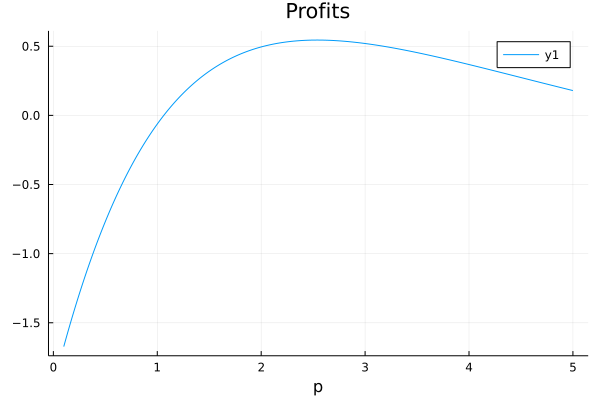

In [20]:
plot(pvec, Πvec; title="Profits", xlabel="p")

In [21]:
using Optim

In [25]:
# Π(pvec::Vector) = Π.(pvec)
# Π([0.3])

1-element Vector{Float64}:
 -1.1751201105331748

In [ ]:
optimize(Π, 1.0) # error: initial guess should be a vector

In [ ]:
optimize(Π, [1.0]) # \pi does not return the right type

In [29]:
fobj(x::Vector) = Π(x[1])
optimize(fobj, [1.0])

 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -Inf

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    1000
    f(x) calls:    2990


In [32]:
result = optimize(u->-Π(u[1]), [1.0])

 * Status: success

 * Candidate solution
    Final objective value:     -5.448588e-01

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    9
    f(x) calls:    21


In [38]:
result.minimizer

1-element Vector{Float64}:
 2.53936767578125

In [55]:
fieldnames(typeof(result))

(:method, :initial_x, :minimizer, :minimum, :iterations, :iteration_converged, :x_converged, :x_abstol, :x_reltol, :x_abschange, :x_relchange, :f_converged, :f_abstol, :f_reltol, :f_abschange, :f_relchange, :g_converged, :g_abstol, :g_residual, :f_increased, :trace, :f_calls, :g_calls, :h_calls, :ls_success, :time_limit, :time_run, :stopped_by)

In [58]:
Optim.converged(result)

true

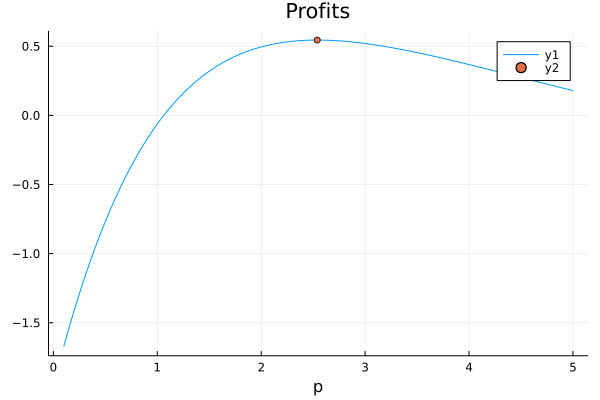

In [44]:
pl = plot(pvec, Πvec; title="Profits", xlabel="p")
scatter!(pl, [result.minimizer], [-result.minimum]; )
# plot!(pl, [result.minimizer], [-result.minimum]; marker=:o )

In [ ]:
function f(x)
    return
end

In [50]:
f(x::Float64) = x^2
f(x::Int64) = x^3

f (generic function with 2 methods)

In [53]:
methods(f)

# 2 methods for generic function "f":
[1] f(x::Float64) in Main at /home/pablo/Teaching/eco309/tutorials/3_Optimization.ipynb:1
[2] f(x::Int64) in Main at /home/pablo/Teaching/eco309/tutorials/3_Optimization.ipynb:2

In [51]:
f(2.0)

4.0

In [52]:
f(2)

8

In [54]:
f(x::Number,y::Int64) = x + y^2
f(x::Number,y::Float64) = x + y^3

f (generic function with 4 methods)

In [47]:
λ = (x->x^2)

#21 (generic function with 1 method)

In [48]:
λ(0.2)

0.04000000000000001

__Now, consider the constraint $x<0.3$ and maximize $f$ under this new constraint.__

__Reformulate the problem as a root finding problem with lagrangians. Write the complementarity conditions.__

__Solve using NLSolve.jl__

---

## Consumption optimization

A consumer has preferences $U(c_1, c_2)$ over two consumption goods $c_1$ and $c_2$.

Given a budget $I$, consumer wants to maximize utility subject to the budget constraint $p_1 c_1 + p_2 c_2 \leq I$.

We choose a Stone-Geary specification where

$U(c_1, c_2)=\beta_1 \log(c_1-\gamma_1) + \beta_2 \log(c_2-\gamma_2)$

__Write the Karush-Kuhn-Tucker necessary conditions for the problem.__

__Verify the KKT conditions are sufficient for optimality.__

__Derive analytically the demand functions, and the shadow price.__

__Interpret this problem as a complementarity problem and solve it using NLSolve.__

__Produce some nice graphs with isoutility curves, the budget constraint and the optimal choice.__

